In [4]:
#loading packages:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [6]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold,StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from imblearn.over_sampling import SMOTE

In [24]:
#Read in document
df = pd.read_excel('/prediction_data.xlsx',sheet_name = 'MCI_AD_vs_Ctrl')

In [27]:
#Preparing variables for prediction
X = df.drop(['Clinical','Well'], axis=1)
y = df['Clinical']


In [29]:
#Scaling and normalizing predictors
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X =pd.DataFrame(X_scaled, columns=X.columns)
X.head()
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_minmax, y,test_size=0.25,random_state=42, stratify = y)


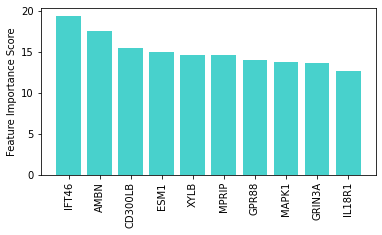

In [57]:
# Get most important indices by sorting
indices = np.argsort(selector.scores_)[::-1]

# Get top 15 feature names
features = []
for i in range(15):
    features.append(df.columns[indices[i]])

# Now plot
plt.figure()
plt.bar(features, selector.scores_[indices[range(10)]], color='Mediumturquoise', align='center')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance Score')
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('Feature_importance_AD_MCI_vs_CTRL.pdf')
plt.show()


In [36]:
#Testing models with all features
all_model = [ DecisionTreeClassifier(),
            RandomForestClassifier(),  GradientBoostingClassifier(), 
             SGDClassifier()]
#,'GaussianNB', 'ComplementNB',GaussianNB(), ComplementNB() SVC(),'SVC',
#Quality measure
recall = []
accuracy = []
precision = []

for model in all_model:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean()
    recall.append(cv)

    cv = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    accuracy.append(cv)

    cv = cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean()
    precision.append(cv)

model = [ 'DecisionTreeClassifier',
         'RandomForestClassifier', 'GradientBoostingClassifier',
         'SGDClassifier']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
score.style.background_gradient(high=1,axis=0, cmap=plt.cm.plasma)

,Model,Accuracy,Precision,Recall
0,DecisionTreeClassifier,0.585714,0.513333,0.514286
1,RandomForestClassifier,0.814286,0.946429,0.914286
2,GradientBoostingClassifier,0.542857,0.545397,0.600000
3,SGDClassifier,0.828571,0.950000,0.771429


In [49]:
##### -- RANDOM FOREST CLASSIFIER -- #####
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)


Confusion matrix, without normalization
[[ 8  4]
 [ 1 11]]
Normalized confusion matrix
[[ 8  4]
 [ 1 11]]


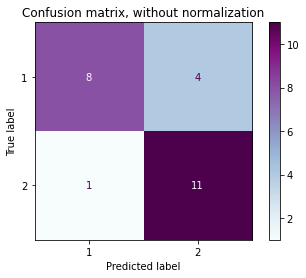

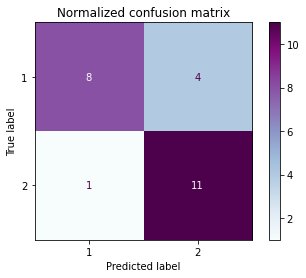

In [50]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc,
        X_test,
        y_test,
        cmap=plt.cm.BuPu,
        #normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('Confusion_matrix_MCI_AD_vs_Ctrl.pdf')
plt.show()

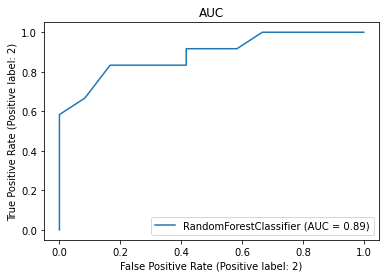

In [39]:
#Vizualize AUC
ROC_rfc = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
_ = ROC_rfc.ax_.set_title("AUC")
plt.savefig('AUC_MCI_AD_vs_CTRL.pdf')
plt.show()